# **Sentiment Analysis using Textblob and Vader**
## Nha Tran 

Main objectives:

    Import library TextBlob and Vader
    Read all the text files in the two folders pos and neg
    Visualize data (distribution)
    Set thresholds for classifying sentences as postive or negative


## Textblob

In [98]:
import os
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

### Read files

In [69]:
# Read text file Function
def read_text(file_name):
    count = 0
    with open(file_name,'r') as f:  
        data = f.read()
        return data

In [70]:
# Iterate through all files Functions
def read_folder(directory):
    data_list = []
    for file in os.listdir(directory):
        # Check if file is in text 
        if file.endswith(".txt"):
            file_path = f"{directory}{file}"
            # Read each text file
            data = read_text(file_path)
            analysis = TextBlob(data)
            data_list.append(analysis.sentiment)
    return data_list

In [71]:
# Positive text data and Negative text data
positive = read_folder("txt_sentoken/pos/")
negative = read_folder("txt_sentoken/neg/")
print(len(positive))
print(len(negative))

1000
1000


In [74]:
positive[0]

Sentiment(polarity=0.2211734693877551, subjectivity=0.6448805163090879)

In [75]:
negative[0]

Sentiment(polarity=0.02624018066495944, subjectivity=0.5377913384550552)

In [76]:
# Create list of polarity score
pos_polarity = [item.polarity for item in positive]
neg_polarity = [item.polarity for item in negative]

<AxesSubplot:>

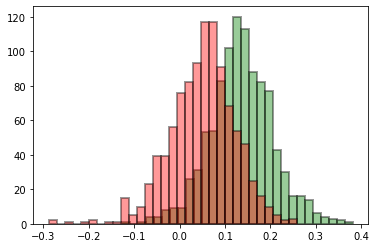

In [231]:
sns.distplot(pos_polarity, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='green')
sns.distplot(neg_polarity, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='red')

In [77]:
# Create list of subjectivity score
pos_sub = [item.subjectivity for item in positive]
neg_sub = [item.subjectivity for item in negative]

<AxesSubplot:>

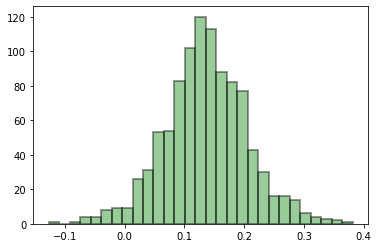

In [99]:
# Create distribution graph for positive documents (polarity and subjectivity)
sns.distplot(pos_polarity, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='green')

<AxesSubplot:>

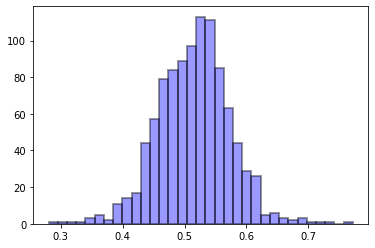

In [100]:
sns.distplot(pos_sub, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='blue')

<AxesSubplot:>

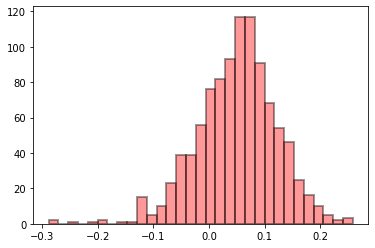

In [258]:
# Create distribution graph for negative documents (polarity and subjectivity)
sns.distplot(neg_polarity, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='red')

<AxesSubplot:>

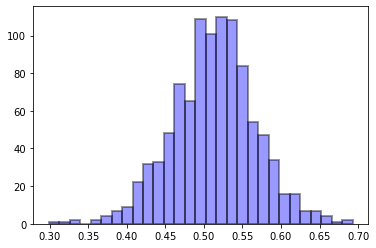

In [145]:
sns.distplot(neg_sub, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='blue')

<AxesSubplot:>

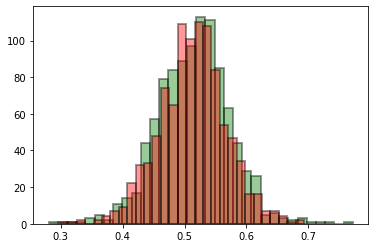

In [260]:
sns.distplot(pos_sub, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='green')
sns.distplot(neg_sub, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='red')

### Accuracy

In [272]:
# Positive Accuracy with polarity threshold greater than 0 
pos_accu = [item for item in positive if item.polarity > 0]
print(f"Positive accuracy = {len(pos_accu)/1000}")

# Negative Accuracy with polarity threshold less than 0 
neg_accu = [item for item in negative if item.polarity <= 0]
print(f"Negative accuracy = {len(neg_accu)/1000}")

Positive accuracy = 0.971
Negative accuracy = 0.229


In [262]:
# Positive Accuracy with polarity threshold greater than 0.08 and subjectivity threshold less than 0.65
pos_accu = [item for item in positive if item.polarity > 0.08 and item.subjectivity < 0.65]
print(f"Positive accuracy = {len(pos_accu)/1000}")

# Negative Accuracy with polarity threshold less than 0.08 and subjectivity threshold less than 0.65
neg_accu = [item for item in negative if item.polarity < 0.08 and item.subjectivity < 0.65]
print(f"Negative accuracy = {len(neg_accu)/1000}")

Positive accuracy = 0.797
Negative accuracy = 0.668


In [263]:
# Positive Accuracy with polarity threshold greater than 0.1
pos_accu = [item for item in positive if item.polarity > 0.1]
print(f"Positive accuracy = {len(pos_accu)/1000}")

# Negative Accuracy with polarity threshold less than 0.1
neg_accu = [item for item in negative if item.polarity < 0.1]
print(f"Negative accuracy = {len(neg_accu)/1000}")

Positive accuracy = 0.719
Negative accuracy = 0.773


## **Vader**

In [153]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [171]:
# Iterate through all files Functions
def read_folder_vader(directory):
    data_list = []
    for file in os.listdir(directory):
        # Check if file is in text 
        if file.endswith(".txt"):
            file_path = f"{directory}{file}"
            # Read each text file
            data = read_text(file_path)
            analysis = analyzer.polarity_scores(data)
            #data_list.append(analysis["compound"])
            data_list.append(analysis)
    return data_list

In [172]:
pos = read_folder_vader("txt_sentoken/pos/")
neg = read_folder_vader("txt_sentoken/neg/")

### **Accuracy**

In [264]:
# Positive Accuracy with compound score greater than 0 
# Negative Accuracy with compound score less than 0 
pos_comp = [item['compound'] for item in pos if item['compound'] > 0]
neg_comp = [item['compound'] for item in neg if item['compound'] <= 0]
print(f"Positive Accuracy = {len(pos_comp)/1000}")
print(f"Negative Accuracy = {len(neg_comp)/1000}")

Positive Accuracy = 0.843
Negative Accuracy = 0.435


### Typical threshold values are:

    - positive sentiment: compound score >= 0.05
    - neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    - negative sentiment: compound score <= -0.05

In [269]:
# Positive Accuracy with compound threshold greater than 0.05 
# Negative Accuracy with compound threshold less than or equal 0.05 
pos_comp_thres = [item['compound'] for item in pos if item['compound'] > 0.05]
neg_comp_thres = [item['compound'] for item in neg if item['compound'] <= -0.05]
print(f"Positive Accuracy = {len(pos_comp_thres)/1000}")
print(f"Negative Accuracy = {len(neg_comp_thres)/1000}")

Positive Accuracy = 0.843
Negative Accuracy = 0.432


<AxesSubplot:>

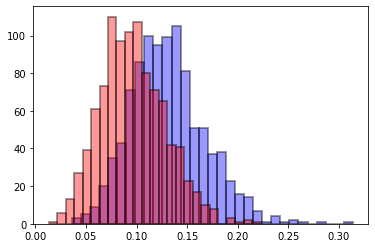

In [270]:
# Graph distribution graph for positive score and negative score
pos_comp_g = [item['pos'] for item in pos]
neg_comp_g = [item['neg'] for item in neg]
sns.distplot(pos_comp_g, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='blue')
sns.distplot(neg_comp_g, kde=False,hist_kws=dict(edgecolor="black", linewidth=2), color='red')

In [271]:
# Positive Accuracy with negative score threshold less than 0.2
# Negative Accuracy with positive score threshold less than 0.2
pos_comp_thres = [item for item in pos if item['neg'] < 0.2]
neg_comp_thres = [item for item in neg if item['pos'] < 0.2]

print(f"Positive Accuracy = {len(pos_comp_thres)/1000}")
print(f"Negative Accuracy = {len(neg_comp_thres)/1000}")

Positive Accuracy = 0.999
Negative Accuracy = 0.999


### Conclusion

TextBlob returns polarity and subjectivity score while Vader returns positive score, neutral score, negative score, and compound score which is a normalized, weighted, composite score. 

For each library, I tried to set standardized thresholds for classifying documents.
- **TextBlob**: I started out with setting polarity threshold greater than 0, 0.08, and 0.1 with subjectivity threshold less than 0.65 and vice versa.

    The best result is when polarity threshold equals to 0.1. (Positive accuracy = 0.719 and Negative accuracy = 0.773)


- **Vader**: I started out with setting compound score greater than 0 and 0.05 as well as positive and negative score threshold less than 0.2.

    The best result is when the positive or negative score threshold less than 0.2. (Positive Accuracy = 0.999 and Negative Accuracy = 0.999)


I also learned that Vader is better at handling the intensity in terms of punctuations and capitalization, degree modifiers, conjunctions, slangs, and emoticons.